<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - BTC</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>     

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_BTC.csv')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   BTC-USD_ADJCLOSE  1826 non-null   float64
 2   BTC-USD_CLOSE     1826 non-null   float64
 3   BTC-USD_HIGH      1826 non-null   float64
 4   BTC-USD_LOW       1826 non-null   float64
 5   BTC-USD_OPEN      1826 non-null   float64
 6   BTC-USD_VOLUME    1826 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
BTC-USD_ADJCLOSE,0
BTC-USD_CLOSE,0
BTC-USD_HIGH,0
BTC-USD_LOW,0
BTC-USD_OPEN,0
BTC-USD_VOLUME,0


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC-USD_ADJCLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_CLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_HIGH,1826.0,1.850453e+04,1.812314e+04,1.294830e+03,6.601735e+03,9.460084e+03,3.393167e+04,6.878962e+04
BTC-USD_LOW,1826.0,1.750229e+04,1.713547e+04,1.265930e+03,6.398990e+03,9.144854e+03,3.127879e+04,6.638206e+04
BTC-USD_OPEN,1826.0,1.802713e+04,1.766487e+04,1.265990e+03,6.493085e+03,9.296878e+03,3.278917e+04,6.754973e+04
BTC-USD_VOLUME,1826.0,2.276132e+10,2.063458e+10,3.296310e+08,5.586124e+09,1.904227e+10,3.344625e+10,3.509679e+11


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
859,2019-09-02,10346.760742,10346.760742,10396.591797,9730.650391,9757.473633,17248102294
575,2018-11-22,4365.939941,4365.939941,4629.640137,4365.640137,4611.569824,4569370000
354,2018-04-15,8329.110352,8329.110352,8338.419922,7999.330078,7999.330078,5244480000
850,2019-08-24,10159.960938,10159.960938,10418.020508,9982.296875,10407.644531,15451030650
168,2017-10-11,4826.479980,4826.479980,4873.729980,4751.629883,4789.250000,1222279936
212,2017-11-24,8253.690430,8253.690430,8374.160156,7940.930176,8074.020020,5058610176
758,2019-05-24,7987.371582,7987.371582,8140.719727,7824.448730,7881.695312,25919126991
956,2019-12-08,7564.345215,7564.345215,7634.606445,7476.091309,7551.338867,15409908086
1018,2020-02-08,9865.119141,9865.119141,9876.749023,9678.910156,9793.070312,35172043762
1420,2021-03-16,56804.902344,56804.902344,56833.179688,53555.027344,55840.785156,59749798599


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008,1.177910,2.282899
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992,2.720586,2.996948
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992,0.095711,3.010750
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984,0.298843,0.911641
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008,1.930426,2.508897


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

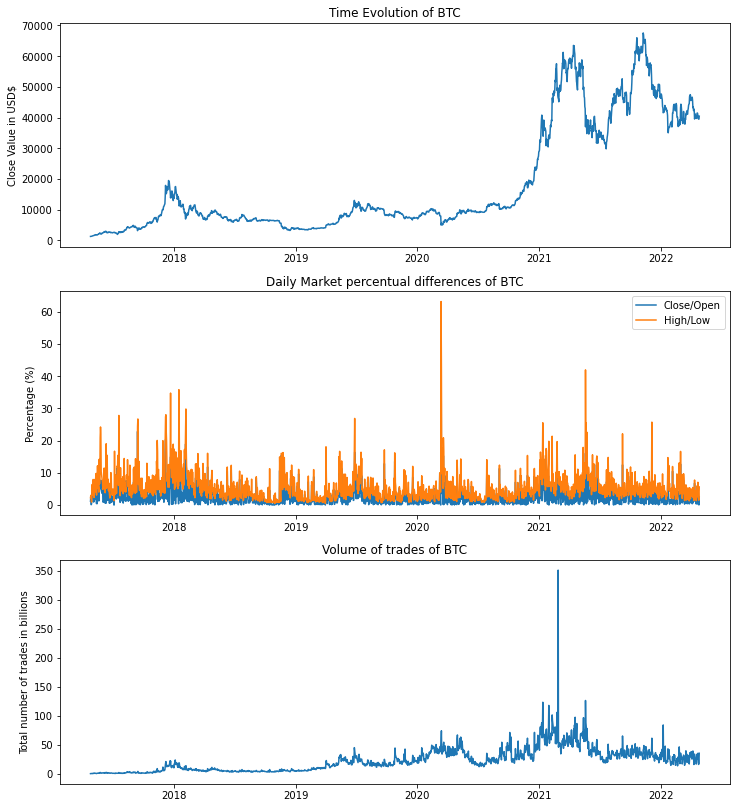

In [13]:
coin_name = plot_coinValue(df)

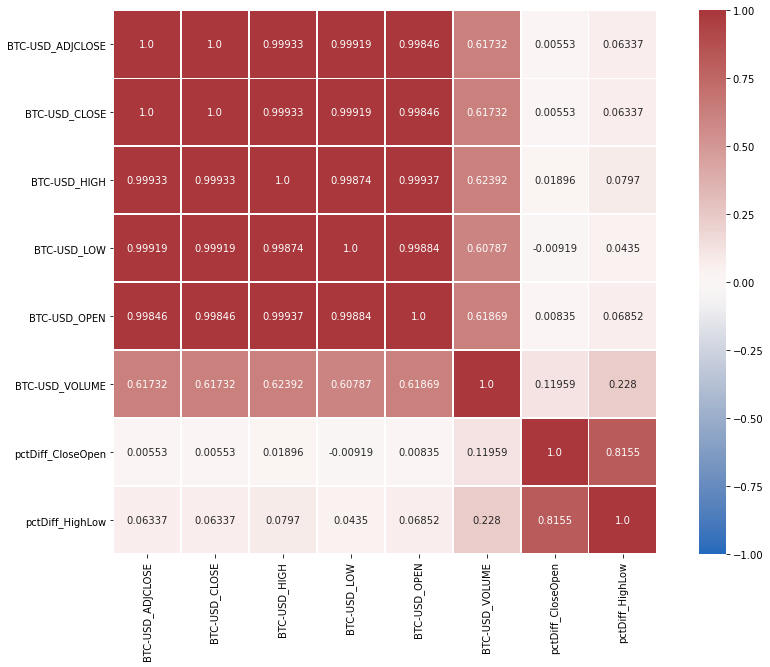

In [14]:
import seaborn as sns 

metric = df.columns #- ['Date']

# Prepare figure
fig = plt.figure(figsize=(15, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. 
corr = np.round(df[metric].corr(method="pearson"), decimals=5)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.0
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data = corr, 
            annot = annot,
            cmap = sns.color_palette("vlag", as_cmap=True),
            fmt='s',
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5)

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_correlationMatrix'+'.png')

In [15]:
#FILTER DATASET
df = df.loc[df['Date']>= '2022-01-01']
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1711,2022-01-01,47686.812500,47686.812500,47827.312500,46288.484375,46311.746094,24582667004,2.883536,3.324430
1712,2022-01-02,47345.218750,47345.218750,47881.406250,46856.937500,47680.925781,27951569547,0.709062,2.186376
1713,2022-01-03,46458.117188,46458.117188,47510.726562,45835.964844,47343.542969,33071628362,1.905858,3.653816
1714,2022-01-04,45897.574219,45897.574219,47406.546875,45752.464844,46458.851562,42494677905,1.222891,3.615285
1715,2022-01-05,43569.003906,43569.003906,46929.046875,42798.222656,45899.359375,36851084859,5.348654,9.651859
...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395,2.082919,7.063114
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745,1.976690,3.719507
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249,0.638169,1.483160
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167,0.023010,1.560876


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [16]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [17]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(15, df)
windowed_df['Date'] = df.iloc[15:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue,Date
0,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,47345.218750,47686.812500,43113.878906,2022-01-16
1,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,47345.218750,42250.550781,2022-01-17
2,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,42375.632812,2022-01-18
3,42375.632812,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,41744.328125,2022-01-19
4,41744.328125,42375.632812,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,40680.417969,2022-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,43503.847656,43206.738281,40527.363281,2022-04-21
96,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,43503.847656,39740.320312,2022-04-22
97,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,39486.730469,2022-04-23
98,39486.730469,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,39469.292969,2022-04-24


In [18]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((100,), (100, 15, 1), (100,))

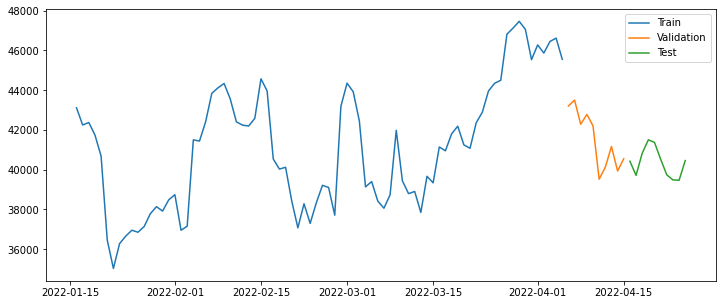

In [19]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [20]:
#!pip install tensorflow

In [30]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((15, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [26]:
#BEST SOLUTION OF THE MODEL

# MSE=494742.562
# Batch Size: 1000
# Number of Epochs: 100
# Value of Learning Rate: 0.078

model = Sequential([layers.Input((15, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.078),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 1702051200.0000 - mean_absolute_error: 41136.8633 - val_loss: 1725966720.0000 - val_mean_absolute_error: 41521.9570 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1701464448.0000 - mean_absolute_error: 41129.7305 - val_loss: 1724813952.0000 - val_mean_absolute_error: 41508.0742 - 25ms/epoch - 25ms/step
Epoch 3/100
1/1 - 0s - loss: 1700322688.0000 - mean_absolute_error: 41115.8438 - val_loss: 1722802944.0000 - val_mean_absolute_error: 41483.8438 - 26ms/epoch - 26ms/step
Epoch 4/100
1/1 - 0s - loss: 1698330624.0000 - mean_absolute_error: 41091.6133 - val_loss: 1719673600.0000 - val_mean_absolute_error: 41446.1094 - 26ms/epoch - 26ms/step
Epoch 5/100
1/1 - 0s - loss: 1695230976.0000 - mean_absolute_error: 41053.8828 - val_loss: 1715151616.0000 - val_mean_absolute_error: 41391.5195 - 27ms/epoch - 27ms/step
Epoch 6/100
1/1 - 0s - loss: 1690751744.0000 - mean_absolute_error: 40999.2930 - val_loss: 1708931968.0000 - val_mean_absolute_error: 41316.3203 - 26ms/ep

Epoch 50/100
1/1 - 0s - loss: 9889738.0000 - mean_absolute_error: 2684.3003 - val_loss: 4306963.5000 - val_mean_absolute_error: 1652.3121 - 27ms/epoch - 27ms/step
Epoch 51/100
1/1 - 0s - loss: 11158312.0000 - mean_absolute_error: 2797.8567 - val_loss: 9701358.0000 - val_mean_absolute_error: 2794.2192 - 28ms/epoch - 28ms/step
Epoch 52/100
1/1 - 0s - loss: 15579392.0000 - mean_absolute_error: 3124.8467 - val_loss: 16445390.0000 - val_mean_absolute_error: 3814.6685 - 27ms/epoch - 27ms/step
Epoch 53/100
1/1 - 0s - loss: 21522926.0000 - mean_absolute_error: 3698.0181 - val_loss: 23132404.0000 - val_mean_absolute_error: 4608.5474 - 29ms/epoch - 29ms/step
Epoch 54/100
1/1 - 0s - loss: 27587174.0000 - mean_absolute_error: 4299.6406 - val_loss: 28703648.0000 - val_mean_absolute_error: 5177.8325 - 28ms/epoch - 28ms/step
Epoch 55/100
1/1 - 0s - loss: 32711836.0000 - mean_absolute_error: 4820.5005 - val_loss: 32480954.0000 - val_mean_absolute_error: 5530.5747 - 26ms/epoch - 26ms/step
Epoch 56/100


Epoch 100/100
1/1 - 0s - loss: 10063389.0000 - mean_absolute_error: 2698.3013 - val_loss: 1916829.0000 - val_mean_absolute_error: 1268.3262 - 22ms/epoch - 22ms/step


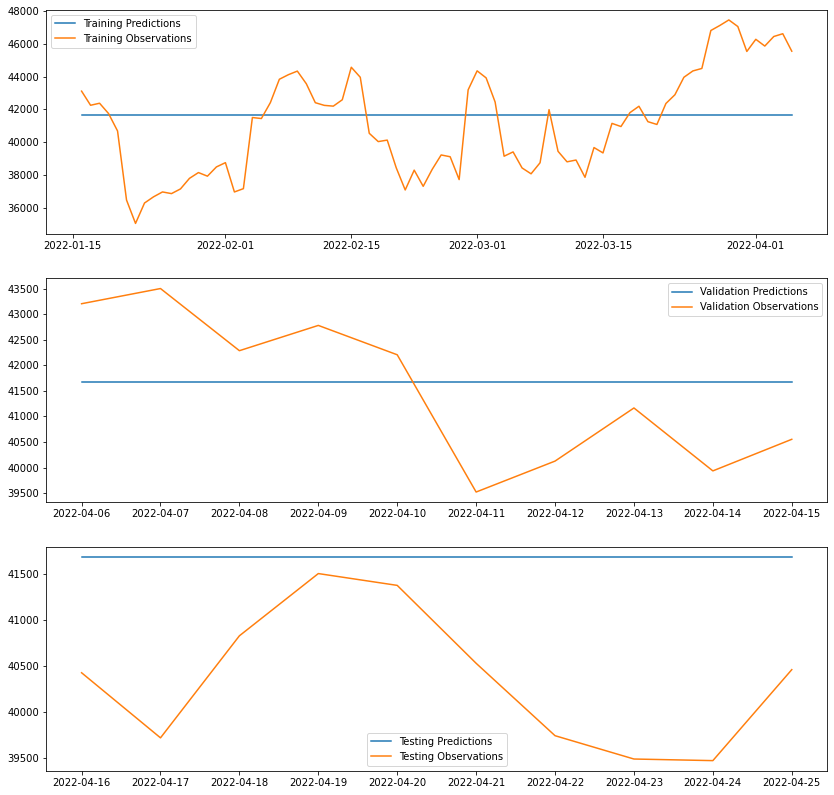

In [27]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [28]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

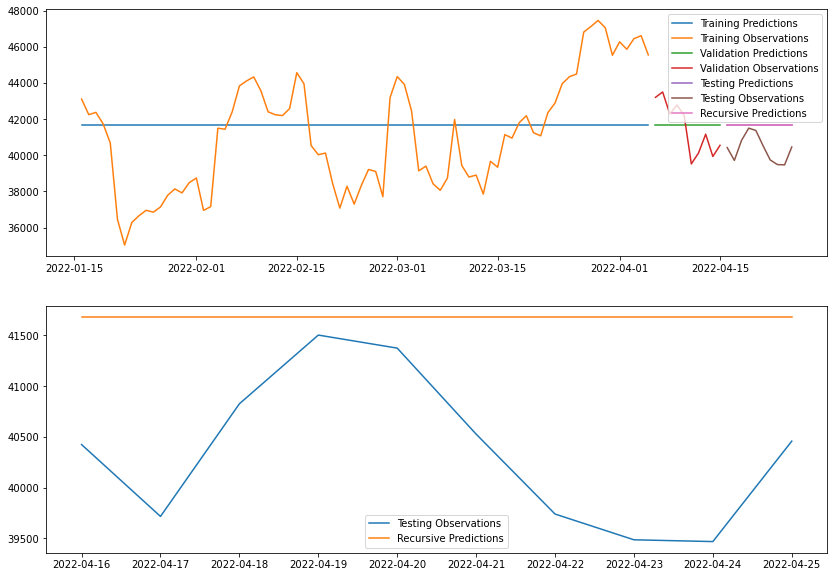

In [29]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')